In [1]:
import pandas as pd
import numpy as np
import seaborn as scn
import matplotlib.pyplot as plt
import os


In [3]:
path=r'C:\Users\manish\Downloads\bank (2).csv'
bank_df=pd.read_csv(path,sep=';')

In [5]:
corr_df=bank_df.corr(numeric_only=True)
corr_df

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


<Axes: >

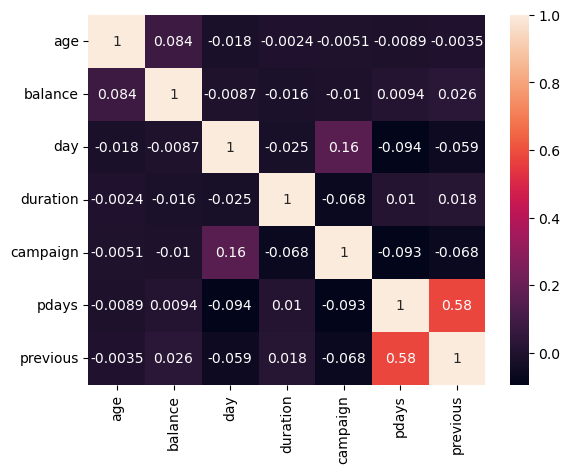

In [9]:
scn.heatmap(corr_df,annot=True)

**MAP_Method**

In [16]:
unique_lab=bank_df['job'].unique()
list1=[i for i in range(len(unique_lab))]
dict1=dict(zip(unique_lab,list1))
bank_df['job']=bank_df['job'].map(dict1)
bank_df['job']

0       0
1       1
2       2
3       2
4       3
       ..
4516    1
4517    4
4518    5
4519    3
4520    6
Name: job, Length: 4521, dtype: int64

In [24]:
path=r'C:\Users\manish\Downloads\bank (2).csv'
bank_df=pd.read_csv(path,sep=';')

In [26]:
cat_col=bank_df.select_dtypes(include='object').columns

In [28]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [32]:
for i in cat_col:
    unique_lab=bank_df[i].unique()
    list1=[i for i in range(len(unique_lab))]
    dict1=dict(zip(unique_lab,list1))
    bank_df[i]=bank_df[i].map(dict1)
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,0,0,0,1787,0,0,0,19,0,79,1,-1,0,0,0
1,33,1,0,1,0,4789,1,1,0,11,1,220,1,339,4,1,0
2,35,2,1,2,0,1350,1,0,0,16,2,185,1,330,1,1,0
3,30,2,0,2,0,1476,1,1,1,3,3,199,4,-1,0,0,0
4,59,3,0,1,0,0,1,0,1,5,1,226,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,0,1,0,-333,1,0,0,30,7,329,5,-1,0,0,0
4517,57,4,0,2,1,-3313,1,1,1,9,1,153,1,-1,0,0,0
4518,57,5,0,1,0,295,0,0,0,19,5,151,11,-1,0,0,0
4519,28,3,0,1,0,1137,0,0,0,6,4,129,4,211,3,2,0


**LabelEncoder**

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
path=r'C:\Users\manish\Downloads\bank (2).csv'
bank_df=pd.read_csv(path,sep=';')

In [41]:
cat_col=bank_df.select_dtypes(include='object').columns

In [47]:
bank_df['job']=le.fit_transform(bank_df['job'])
bank_df['job']

0       10
1        7
2        4
3        4
4        1
        ..
4516     7
4517     6
4518     9
4519     1
4520     2
Name: job, Length: 4521, dtype: int64

In [59]:
path=r'C:\Users\manish\Downloads\bank (2).csv'
bank_df=pd.read_csv(path,sep=';')
cat_col=bank_df.select_dtypes(include='object').columns
for i in cat_col:
    bank_df[i]=le.fit_transform(bank_df[i])
bank_df    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


**OneHot features**
- use for converting the cat col into num col